Importing all the Necessary Libraries

In [903]:
import tensorflow as tf
import os
import cv2 as cv
import imghdr

In [904]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[]


In [905]:
datadir = 'C:\\Users\\saksh\\OneDrive\\Documents\\SML_EndSemProject'

# os.listdir(os.path.join(datadir, 'dosa'))

In [906]:
img_exten = ['jpeg', 'jpg', 'bmp', 'png']

In [907]:
for image_class in os.listdir(datadir):
    for image in os.listdir(os.path.join(datadir, image_class)):
        image_path = os.path.join(datadir, image_class, image)
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exten:
                print('Image does not right Extension {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))



In [908]:
import numpy as np
from matplotlib import pyplot as plt

In [909]:
data = tf.keras.utils.image_dataset_from_directory('C:\\Users\\saksh\\OneDrive\\Documents\\SML_EndSemProject')

Found 1464 files belonging to 9 classes.


In [910]:
data_iterator = data.as_numpy_iterator()
data_batch = data_iterator.next() #Get another Batch from the Iterator
data_batch[0].shape #tells about the batch (batch size, img size, channels)
data_batch[1] #Assigns Indexes to classes

array([0, 5, 1, 8, 4, 8, 5, 8, 3, 7, 8, 3, 5, 1, 8, 8, 8, 1, 6, 3, 2, 0,
       0, 2, 0, 4, 3, 0, 7, 6, 4, 2])

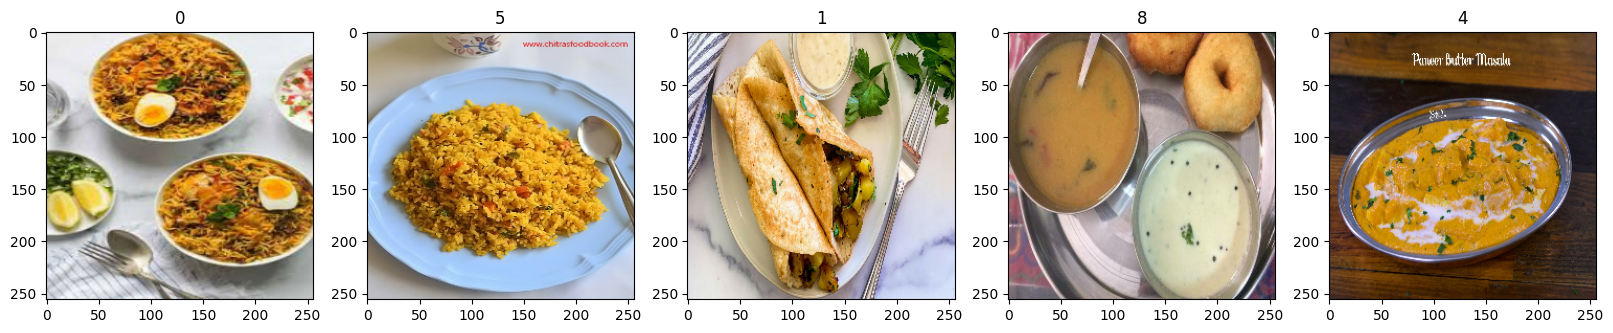

In [911]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for idx, img in enumerate(data_batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data_batch[1][idx])

In [912]:
data = data.map(lambda x, y: (x/255, y))

In [913]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

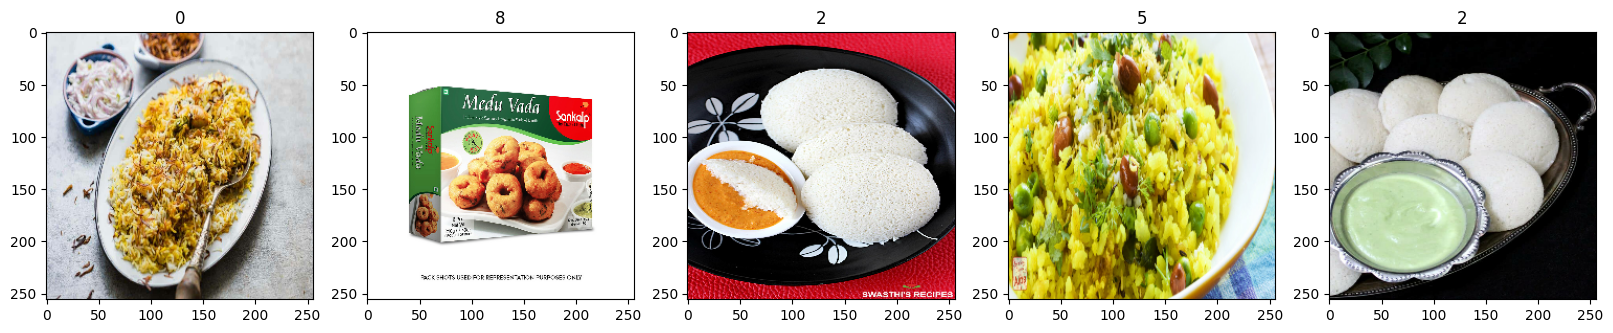

In [914]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [915]:
len(data)

46

In [916]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)+1
test_size = int(len(data) * 0.1)

train_size+val_size+test_size

46

In [917]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


## Machine Learning

In [918]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [919]:
model = Sequential()

In [920]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(9, activation='softmax'))

In [921]:
tf.optimizers # Selecting adam

<module 'keras.api._v2.keras.optimizers' from 'c:\\Users\\saksh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\optimizers\\__init__.py'>

In [922]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [923]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 30, 30, 64)     

In [924]:
logdir = 'C:\\Users\\saksh\\OneDrive\\Documents\\Training_Logs'

In [925]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [926]:
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
num_classes = 9

train = train.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val = val.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

In [927]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/12
32/32 [==============================] - 17s 480ms/step - loss: 2.1308 - accuracy: 0.2148 - val_loss: 1.9192 - val_accuracy: 0.2781
Epoch 2/12
32/32 [==============================] - 18s 531ms/step - loss: 1.4640 - accuracy: 0.4736 - val_loss: 1.3933 - val_accuracy: 0.5125
Epoch 3/12
32/32 [==============================] - 23s 679ms/step - loss: 0.9920 - accuracy: 0.6602 - val_loss: 1.1853 - val_accuracy: 0.6344
Epoch 4/12
32/32 [==============================] - 23s 684ms/step - loss: 0.5694 - accuracy: 0.8232 - val_loss: 0.8644 - val_accuracy: 0.7563
Epoch 5/12
32/32 [==============================] - 23s 681ms/step - loss: 0.2705 - accuracy: 0.9307 - val_loss: 0.8474 - val_accuracy: 0.7688
Epoch 6/12
32/32 [==============================] - 23s 680ms/step - loss: 0.1809 - accuracy: 0.9648 - val_loss: 0.6918 - val_accuracy: 0.8156
Epoch 7/12
32/32 [==============================] - 23s 683ms/step - loss: 0.1249 - accuracy: 0.9668 - val_loss: 0.5834 - val_accuracy: 0.8562

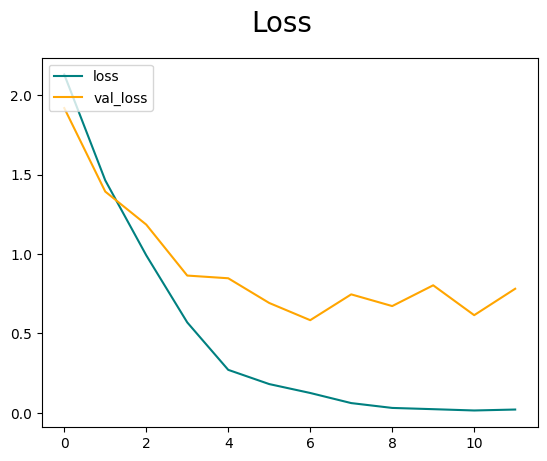

In [928]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

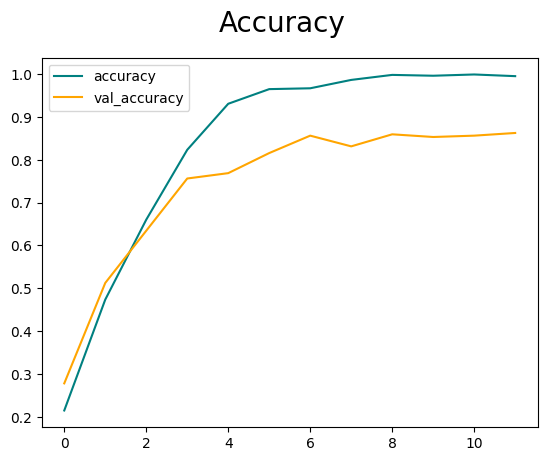

In [929]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [930]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [931]:
pre =  Precision()
re = Recall()
acc = BinaryAccuracy()

In [932]:
for batch in test.as_numpy_iterator():
    X,y= batch
    yhat= model.predict(X)
    y_onehot= tf.one_hot(y, depth= num_classes)
    pre.update_state(y_onehot, yhat)
    re.update_state(y_onehot,yhat)
    acc.update_state(y_onehot, yhat)

1/1 [==============================] - 0s 144ms/step


In [933]:
print(f'Precision:{pre.result().numpy()*100}, Recall:{pre.result().numpy()*100}, Accuracy:{pre.result().numpy()*100}')

Precision:82.75862336158752, Recall:82.75862336158752, Accuracy:82.75862336158752


## Evaluation


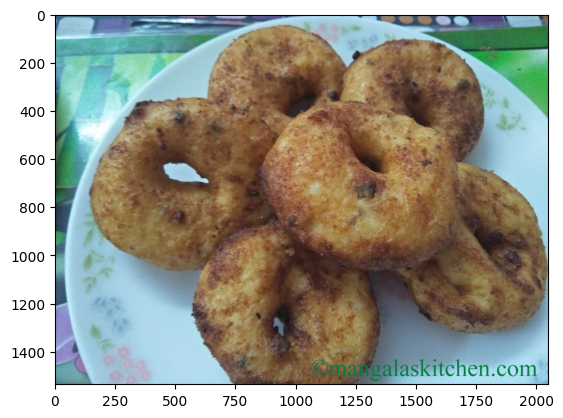

In [934]:
img = cv.imread('C:\\Users\\saksh\\OneDrive\\Documents\\random_test\\wada_test.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
testimg = cv.cvtColor(img, cv.COLOR_BGR2RGB)

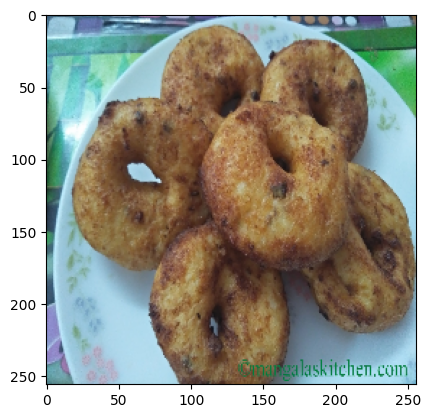

In [935]:
resize = tf.image.resize(testimg, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [936]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [937]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat*100

1/1 [==============================] - 0s 27ms/step


array([[1.2755856e+01, 3.0508665e+01, 1.9465202e-02, 1.3493988e-01,
        1.6462444e-01, 2.0070505e-01, 1.2269352e+01, 5.4866567e+00,
        3.8459740e+01]], dtype=float32)

In [938]:
# if yhat[0,4] == np.amax(yhat):
#     print("Its a Wada")
#     userinp = input("Press 1 to know the Recipe: ")
#     if userinp=='1':
#         print('''Recipe:\n
#         Ingredients:
# •	1 cup urad dal (split black gram)
# •	1 tablespoon rice flour
# •	1/2 teaspoon cumin seeds
# •	1/2 teaspoon black pepper powder
# •	Salt as per taste
# •	Oil for frying
# •	Water
# Instructions:
# 1.	Wash the urad dal and soak it in enough water for 3-4 hours.
# 2.	Drain the water and grind the urad dal to a smooth paste using a wet grinder or a mixer-grinder. Add water as required while grinding. The consistency of the batter should be thick and smooth.
# 3.	Transfer the batter to a large bowl. Add rice flour, cumin seeds, black pepper powder, and salt to taste. Mix well using your hands for 5-10 minutes until the batter becomes light and fluffy. The more you mix, the fluffier the batter will become.
# 4.	Heat oil in a deep frying pan on medium flame. Wet your hand and take a small portion of the batter. Make a hole in the center of the batter with your thumb and shape it into a round, flat disc.
# 5.	Gently slide the wada into the hot oil and fry until it turns golden brown on both sides. Use a slotted spoon to remove the wada from the oil and place it on a plate lined with paper towels to remove excess oil.
# 6.	Repeat the process with the remaining batter, wetting your hand every time before shaping the wadas.
# 7.	Serve hot with sambar, coconut chutney, or any other chutney of your choice.

# ''')
    
# elif yhat[0,3] == np.amax(yhat):
#     print("Its an Idli")
#     userinp = input("Press 1 to know the Recipe: ")
#     if userinp=='1':
#         print('''Recipe:\n
#         Ingredients:
# •	2 cups idli rice
# •	1 cup urad dal (split black gram)
# •	1 teaspoon fenugreek seeds
# •	Salt as per taste
# •	Water
# Instructions:
# 1.	Wash the rice and urad dal separately until the water runs clear. Soak the rice and urad dal separately in enough water for at least 4 hours.
# 2.	Drain the water and grind the urad dal and fenugreek seeds to a fine, fluffy batter using a wet grinder or a mixer-grinder. Add water as required while grinding. The consistency of the batter should be smooth and fluffy.
# 3.	Transfer the urad dal batter to a large bowl. Add the soaked and drained rice to the grinder, and grind it to a smooth batter. Add water as required while grinding.
# 4.	Transfer the rice batter to the same bowl as the urad dal batter. Add salt to taste and mix the batter well using your hands. Cover the bowl with a lid and keep it in a warm place for 8-10 hours for fermentation. The batter will rise and become frothy after fermentation.
# 5.	Grease the idli moulds with oil or ghee. Pour the batter into the idli moulds, filling them up to 3/4th of their capacity.
# 6.	Heat water in an idli cooker or any large pot. Place the idli stand in the cooker or pot. Steam the idlis for 12-15 minutes on medium flame until they are cooked. To check if they are done, insert a toothpick or a knife into the idli. If it comes out clean, the idlis are ready.
# 7.	Remove the idli stand from the pot and let it cool for 2-3 minutes. Use a spoon or a knife to remove the idlis from the moulds. Serve hot with sambar, coconut chutney, or any other chutney of your choice.


# ''')
    

# elif yhat[0,2] == np.amax(yhat):
#     print("Its a Samosa")
#     userinp = input("Press 1 to know the Recipe: ")
#     if userinp=='1':
#         print('''Recipe:\n
#                 Samosa is a popular Indian snack that is loved by many. It is a deep-fried pastry stuffed with a savory filling. Here's a recipe to make samosas:
# Ingredients:
# •	For the dough:
# •	2 cups all-purpose flour
# •	1/4 cup vegetable oil
# •	1/2 teaspoon salt
# •	Water as required
# •	For the filling:
# •	2 medium-sized potatoes, boiled and peeled
# •	1/2 cup green peas, boiled
# •	1 small onion, finely chopped
# •	1 tablespoon ginger-garlic paste
# •	1 green chili, finely chopped
# •	1/2 teaspoon cumin seeds
# •	1/2 teaspoon coriander powder
# •	1/2 teaspoon garam masala powder
# •	1/4 teaspoon turmeric powder
# •	Salt to taste
# •	1 tablespoon vegetable oil
# •	Oil for deep frying
# Instructions:
# 1.	To make the dough, mix the flour, salt, and oil in a large bowl. Rub the mixture with your hands until it resembles bread crumbs.
# 2.	Add water little by little and knead the mixture into a firm and smooth dough. Cover the dough with a damp cloth and keep it aside for 30 minutes.
# 3.	To make the filling, mash the boiled potatoes in a bowl and add the boiled green peas.
# 4.	Heat oil in a pan and add cumin seeds. When they start to crackle, add chopped onion, ginger-garlic paste, and green chili. Saute for 2 minutes.
# 5.	Add the mashed potato and green peas mixture to the pan. Add coriander powder, garam masala powder, turmeric powder, and salt. Mix everything well and cook for 3-4 minutes. The filling should be dry and not too watery.
# 6.	Once the dough has rested, knead it again for a minute. Divide the dough into 8-10 equal portions.
# 7.	Roll out each portion into a circle of about 6-7 inches in diameter.
# 8.	Cut the circle in half. Take one half and form it into a cone. Seal the edges of the cone by applying water.
# 9.	Fill the cone with the potato and peas mixture, leaving some space on top.
# 10.	Apply water on the open edges of the cone and seal it to form a triangular pyramid shape.
# 11.	Heat oil in a deep pan for frying. Once the oil is hot, add the samosas to the pan.
# 12.	Fry the samosas on medium heat until they turn golden brown.
# 13.	Remove the samosas from the pan and place them on paper towels to remove excess oil.
# 14.	Serve hot with chutney or ketchup.
# Enjoy your delicious homemade samosas!''')


# elif yhat[0,1] == np.amax(yhat):
#     print("Its a Vada Pav")
#     userinp = input("Press 1 to know the Recipe: ")
#     if userinp=='1':
#         print('''Recipe:\n
#         Vada pav is a popular street food from Maharashtra, India. Here's a recipe to make it at home:

# Ingredients:
# For Vada:

# 2 cups boiled and mashed potatoes
# 1/2 cup gram flour (besan)
# 1 tablespoon ginger-garlic paste
# 1 teaspoon mustard seeds
# 1 teaspoon cumin seeds
# 1 teaspoon turmeric powder
# 1 teaspoon red chili powder
# Salt to taste
# Oil for frying
# For Pav:

# 8 pav buns
# 2 tablespoons butter
# Garlic chutney (as per taste)
# Green chutney (as per taste)
# Tamarind chutney (as per taste)
# Onion slices (as per taste)
# Coriander leaves (as per taste)
# Instructions:

# In a bowl, mix mashed potatoes, ginger-garlic paste, mustard seeds, cumin seeds, turmeric powder, red chili powder, and salt.

# In another bowl, make a thick batter by mixing gram flour with water. Add salt and mix well.

# Heat oil in a pan. Take a small ball of potato mixture, flatten it, dip it in the batter, and deep fry till it turns golden brown. Repeat the same with remaining potato mixture.

# Cut pav buns into half and apply butter on both sides. Toast them on a pan until they turn light brown.

# Apply garlic chutney, green chutney, and tamarind chutney on both sides of the pav bun.

# Place one vada in the center of the pav bun. Add onion slices and coriander leaves.

# Press the pav slightly and serve hot.

# Your delicious vada pav is now ready to be enjoyed!''')

# else:
#     print("Its a Dosa")
#     userinp = input("Press 1 to know the Recipe: ")
#     if userinp=='1':
#         print('''Recipe:\n
#         Dosa is a popular South Indian dish made from fermented rice and lentil batter. Here's a recipe to make it at home:
# Ingredients:
# •	1 cup rice
# •	1/2 cup urad dal (split black gram)
# •	1/2 teaspoon fenugreek seeds
# •	Salt to taste
# •	Oil for cooking
# Instructions:
# 1.	Wash rice and urad dal separately and soak them in water for 4-5 hours along with fenugreek seeds.
# 2.	Drain the water and grind rice and urad dal separately to a smooth batter using a grinder or mixer. Add water as required to make a smooth batter.
# 3.	Mix both the batters together in a large bowl. Add salt to taste and mix well.
# 4.	Cover the bowl and keep it in a warm place for 8-10 hours or overnight to ferment.
# 5.	Once the batter is fermented, mix it well. If it's too thick, add some water to make it of pouring consistency.
# 6.	Heat a non-stick tawa or griddle. Spread a ladleful of batter on the tawa in a circular motion to make a thin dosa.
# 7.	Drizzle oil around the edges and on top of the dosa. Cook for a few minutes until the bottom side turns golden brown.
# 8.	Flip the dosa and cook the other side for a minute or so.
# 9.	Remove the dosa from the tawa and serve hot with sambar, coconut chutney, or any other chutney of your choice.
# Your delicious dosa is now ready to be enjoyed!

# ''')
